<img src="images/econ140R_logo.png" width="200" />

In the following cell, please type your name and SID:

In the cell below, please write out the [Honor Code](https://teaching.berkeley.edu/berkeley-honor-code) to reaffirm you are abiding by it.

Did you work with other students? List them below. Please write your answers in your own words, not in theirs.

<h1>ECON 140R - Problem Set 2</h1>

<h2>INSTRUCTIONS</h2>

Please step through this problem set, copying and pasting code as needed, and run the code to produce output. Answer the questions asked, which appear in <font color="blue">blue font</font>. You will earn 100% of the credit on this problem set for <b>completing</b> it with working code and coherent answers. Answers do not need to be correct for full credit.

Throughout, <b>you may consult outside sources like the paper below or other commentary</b>, but your analysis should be in your own words. We will not run TurnItIn software on this Problem Set, but as usual, you should not borrow phrases without attribution or commit "mosaic plagiarism."

In this problem set, you will examine a dataset showing graduate admission decisions, a dichotomous measure of gender, and academic department from the fall 1973 application cohort. The dataset is described and analyzed by [P. J. Bickel, E. A. Hammel, J. W. O'Connell (1975) “Sex Bias in Graduate Admissions: Data from Berkeley,” Science 187(4175): 398-404](https://www-jstor-org.libproxy.berkeley.edu/stable/1739581) and further described in [David Freedman, Robert Pisani, and Roger Purves (2007) Statistics 4th edition. New York: Norton, pp 17–20](https://www.amazon.com/Statistics-4th-David-Freedman/dp/0393929728). I created this dataset using the description offered by FPP. There is a "collapsed" version of these data in __R__'s preloaded `datasets` package called `UCBAdmissions`.

For kicks, here is an off-the-shelf visualization from `UCBAdmissions` that shows us ... well, it shows us something. The $x$-axis splits people into admitted (left) or rejected (right) columns. Then within each of those columns, we see the split between people who identify as female (bottom) or male (top), so that gender identity is the $y$-variable. 

,Male,Female
Admitted,1198,557
Rejected,1493,1278


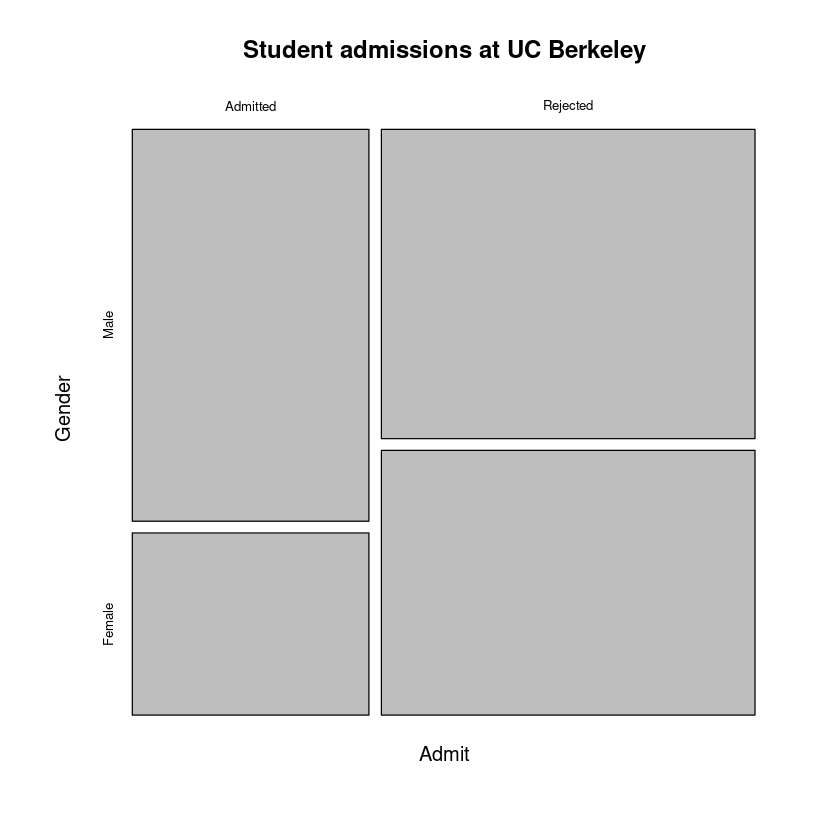

In [1]:
require(graphics)
## Data aggregated over departments
apply(UCBAdmissions, c(1, 2), sum)
mosaicplot(apply(UCBAdmissions, c(1, 2), sum),
           main = "Student admissions at UC Berkeley")

<font color="blue">
    <h3>Question 1.</h3> Does it make much sense to specify gender as the $y$-variable here, meaning that the implicit suggestion is to run this regression:   
    $$
    gender_i = \alpha + \beta \cdot admit_i + \epsilon_i
    $$
    where the variable $admit_i$ is like a 0/1 treatment <u>that causes</u> the variable $gender_i$?
    State yes or no and briefly defend your answer.
</font>

No, it does not make much sense to model gender as the $y$-variable. The outcome variable should be something that is affected by a treatment. Modern political showmanship aside, is hard to imagine many instances, if any, when gender identity is plausibly an outcome variable that is affected by a treatment.

<hr>

Let's look at the reconstructed microdata. Load up our usuals, tidyverse and haven:

In [2]:
library(tidyverse)
library(haven)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



<h2>Multivariate Analysis</h2>

Below is the reconstructed data file. Nothing fancy, mostly zeros and ones. There are a total of 4,486 observations arrayed across 6 departments. The call to `table()` pulls the counts by department and labels them nicely.

In [3]:
ucbadmit <- read_dta("ucbadmit.dta")
head(ucbadmit)
table(ucbadmit$deptchar)

admitted,gender,dept,deptchar,male,female
<dbl>,<dbl+lbl>,<dbl>,<chr>,<dbl>,<dbl>
1,1,1,A,1,0
0,1,1,A,1,0
0,1,1,A,1,0
0,1,1,A,1,0
1,2,1,A,0,1
1,1,1,A,1,0



  A   B   C   D   E   F 
933 545 918 792 584 714 

There are six departments here, blinded for privacy purposes, labeled A through F. It would be useful to have indicator variables that tell us which of these "treatment arms" an individual is in. Let's create these indicator variables:

In [4]:
ucbadmit <- mutate(ucbadmit, deptA = ifelse(deptchar == "A",1,0))
ucbadmit <- mutate(ucbadmit, deptB = ifelse(deptchar == "B",1,0))
ucbadmit <- mutate(ucbadmit, deptC = ifelse(deptchar == "C",1,0))
ucbadmit <- mutate(ucbadmit, deptD = ifelse(deptchar == "D",1,0))
ucbadmit <- mutate(ucbadmit, deptE = ifelse(deptchar == "E",1,0))
ucbadmit <- mutate(ucbadmit, deptF = ifelse(deptchar == "F",1,0))

Let's begin to analyze these data. The visualization above is helpful, provided you can get your head around how the $x$ and $y$ axes seem like they are reversed. Let's instead run a regression using `lm()` that shows the relationship between $y = admitted$, a 0/1 indicator variable for being admitted to UC Berkeley, and $x = female$, a 0/1 indicator for female gender identity:

$$
admitted_i = \alpha + \beta \cdot female_i + \epsilon_i
$$

<h3>
<font color="blue">Complete the code below and run it.</font>
    </h3>

In [5]:
ucb_shortreg <- lm(admitted ~ female, data = ucbadmit)
summary(ucb_shortreg)


Call:
lm(formula = admitted ~ female, data = ucbadmit)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4368 -0.4368 -0.3035  0.5632  0.6965 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.436816   0.009354  46.698   <2e-16 ***
female      -0.133274   0.014625  -9.112   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4816 on 4484 degrees of freedom
Multiple R-squared:  0.01818,	Adjusted R-squared:  0.01796 
F-statistic: 83.04 on 1 and 4484 DF,  p-value: < 2.2e-16


<font color="blue">
    <h3>
    Question 2</h3>
    Look at the regression output above and describe what you see. What is the average admission rate for males? In this simple regression, what is the average effect on the admission rate of being female? Is the effect statistically significant? Describe using the reported numbers in the regression output, and also state what you see in descriptive sentences where you refer to the percentages revealed by the reported numbers. 
</font>

We have a simple OLS regression with admission as a function of a constant (for males) and being female. The average admission rate for males is the constant term, $\alpha = 0.44$ roughly.

The effect of being female is $\beta = -0.13$, and it is statistically significant. 

In words, males are admitted at an average rate of 44%. Females are admitted at a rate 13 percentage points lower, or 31%. The difference is statistically significant.

<hr>

<font color="blue">
    <h3>
    Question 3</h3>
Now translate what you see in the data, in your answer to Question 2, into an informative statement for <b>policy</b> at the University in this era, given that gender equality and diversity are objectives. Write a sentence or two.
</font>

If gender equality and diversity are objectives, the pattern we have seen in the data thus far is worrisome. It appears that women are 13 percentage points less likely to be admitted.

<hr>

<font color="blue">
    <h3>
    Question 4</h3>
The data are fairly sparse, but they also show us the (anonymized) graduate department to which the person applied. Would you expect overall admission rates &mdash; that is, for both genders combined &mdash; admission rates to be the same across university departments, such as the English Department and the Mathematics Department, or would you expect admission rates to differ?
</font>

One would expect very different admission rates across departments, because they are different departments, with different sizes and specialties, and one would not expect prospective students to have somehow redistributed themselves across them to equalize admission rates, via some kind of arbitrage process.

<hr>

<font color="blue">
    <h3>
    Question 5</h3>
Suppose you thought admission rates were the same across departments. What would that imply about the gender-specific admission rate that we should see within each department, given what we saw in campus-wide admissions above? Would there be gender equality, or would we see an advantage for men or for women? 
</font>

If all departments had the same admission rate, then it must be the same as the aggregate admission rate that we saw above. All women would be equally disadvantaged regardless of which department they applied to.

<hr>

<font color="blue">
    <h3>
    Question 6</h3>
Suppose you thought admission rates were different across departments, so that some departments admitted very few applicants and others admitted more applicants. If this were publicly known, do you have a prior belief about which departments &mdash; those with low admission rates or those with high admission rates &mdash; might receive more male applicants? Or similarly, which departments might receive more female applicants? (The setting here is the 1970s, but the story might well be similar today.)
</font>

The fascinating thing about this question is that there are several layers of the onion, so to speak. Self-identified males and females are different in many ways, and college major is a big dimension of difference.

It's going to turn out that women in the sample are much more likely to apply to departments with low admission rates. This likely reflects a variety of factors in these data from the 1970s, some of which may be present today as well. Women especially in the 1970s and earlier were typically dissuaded from continuing in scientific fields, either overtly or implicitly. There also is evidence from Harvard's Claudia Goldin and many others that even today, the pipeline for women into STEM, and into economics for example, is more closed than it is for men, for a variety of reasons. This story would result in women's graduate admissions being focused less on STEM departments and more on humanities and other fields. 

Whether humanities departments are harder to get into than STEM is perhaps the hardest part of this. The data suggest that they certainly were harder to get into. It's hard to find modern data on this; a Google search turned up this link to a [2019 U-of-Washington report](https://grad.uw.edu/wp-content/uploads/2019/06/report2.pdf); page 22 is informative.

The other way one could approach this is by guessing that STEM fields are actually harder to get into. We suspect they are harder to major in, and that might be the reason to guess they are harder to get into. So one might guess the reverse story, that because women are less likely to have been STEM majors for example, then they might be more likely to be admitted into graduate school in those non-STEM fields. An additional perspective is useful: STEM fields have seen the most growth in demand in terms of jobs and training. Based on that, one might guess that STEM fields might have higher graduate admission rates.

<hr>

Let's push our analysis further by running a regression using `lm()` that includes our binary 0/1 controls for the admitting departments. We need to leave out one of the departments as the default category; let's choose department A for that:

$$
admitted_i = \alpha^{M,A} + \beta \cdot female_i 
+ \gamma^B deptB_i
+ \gamma^C deptC_i
+ \gamma^D deptD_i
+ \gamma^E deptE_i
+ \gamma^F deptF_i
+ \epsilon_i
$$

When we run this regression, note that the constant term $\alpha$ becomes the average admission rate for male applicants to department A, the omitted category.

In [6]:
ucb_longreg <- lm(admitted ~ female + deptB + deptC + deptD + deptE + deptF, data = ucbadmit)
summary(ucb_longreg)


Call:
lm(formula = admitted ~ female + deptB + deptC + deptD + deptE + 
    deptF, data = ucbadmit)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66117 -0.34977 -0.07447  0.35807  0.94476 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.64193    0.01465  43.822   <2e-16 ***
female       0.01924    0.01538   1.250    0.211    
deptB       -0.03731    0.02397  -1.557    0.120    
deptC       -0.30360    0.02220 -13.676   <2e-16 ***
deptD       -0.31139    0.02215 -14.057   <2e-16 ***
deptE       -0.40316    0.02495 -16.157   <2e-16 ***
deptF       -0.58669    0.02277 -25.762   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4441 on 4479 degrees of freedom
Multiple R-squared:  0.166,	Adjusted R-squared:  0.1649 
F-statistic: 148.6 on 6 and 4479 DF,  p-value: < 2.2e-16


<font color="blue">
    <h3>
    Question 7</h3>
Look at the regression output above and describe what you see. What is the average admission rate for males who applied to department A? What is the average effect on the admission rate of being female? Is the effect statistically significant? What are the effects on admission rates of applying to departments B, C, D, E, and F? Describe using the reported numbers in the regression output, and also state what you see in descriptive sentences where you refer to the percentages revealed by the reported numbers. 
</font>

We see very different results here.

Male applicants to department A have an admission rate of about 64%, that's the intercept here. The average effect on the admission rate of being female is an increase of 1.9 percentage points, but that effect is statistically insignificant.

The effects on the admission rate of applying to other departments is generally negative. The effect is negative and small (and insignificant) for B, and then negative and pretty large for C and D, around 30 percentage points less. For E and F, the effect is 40 and a whopping 59 percentage points.

This changes the story significantly.

<hr>

<font color="blue">
    <h3>
    Question 8</h3>
Now translate what you see in the data, in your answer to Question 7, into an informative statement for <b>policy</b> at the University in this era, given that gender equality and diversity are objectives. Write a sentence or two.
</font>

Tentatively, we do not appear to see systematic differences in admission rates by gender GIVEN the choice of department. This is not the same thing as equality in access, but it is a far more complicated story than a constant amount of apparent discrimination, or lack of adequate preparation, or a combination of the two. The story is more nuanced, and the problem is probably more endemic and deep-rooted, than we thought.

<hr>

Recall that in Chapter 1, we often tested for balance in the characteristics of study participants across groups. Here, an equivalent check is to look for differences in the male/female mix of applicants to departments. We can operationalize that by calling `lm()` with an equation that looks like this:

$$
female_i = \alpha^A
+ \gamma^B deptB_i
+ \gamma^C deptC_i
+ \gamma^D deptD_i
+ \gamma^E deptE_i
+ \gamma^F deptF_i
+ u_i
$$

where the constant term is now the share of female applicants to department A, the omitted group. Note that this regression would be preposterous on its own; gender identity is not a function of the department to which a person applied! 

Write and run some code below to estimate that equation.

In [7]:
female_reg <- lm(female ~ deptB + deptC + deptD + deptE + deptF, data = ucbadmit)
summary(female_reg)


Call:
lm(formula = female ~ deptB + deptC + deptD + deptE + deptF, 
    data = ucbadmit)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67295 -0.47348 -0.04587  0.35403  0.95413 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.11576    0.01412   8.198 3.17e-16 ***
deptB       -0.06988    0.02325  -3.005  0.00267 ** 
deptC        0.53021    0.02005  26.444  < 2e-16 ***
deptD        0.35773    0.02084  17.166  < 2e-16 ***
deptE        0.55719    0.02276  24.483  < 2e-16 ***
deptF        0.36184    0.02145  16.872  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4313 on 4480 degrees of freedom
Multiple R-squared:  0.2315,	Adjusted R-squared:  0.2306 
F-statistic: 269.8 on 5 and 4480 DF,  p-value: < 2.2e-16


<font color="blue">
    <h3>
    Question 9</h3>
Look at the regression output above and describe what you see. What does the share of female applicants look like across these departments? Is it constant? Describe using the reported numbers in the regression output, and also state what you see in descriptive sentences where you refer to the percentages revealed by the reported numbers. 
</font>

The share of female applicants in department A is the constant term, just 11.6 percent. Department B is slightly more imbalanced, with negative coefficient that pulls the female share down to perhaps only 4-5%.

The female share of applicants most certainly is not constant across departments. It is highest in Department E, at perhaps 66-67%.

<hr>

<font color="blue">
    <h3>
    Question 10</h3>
Now compare the regression output you looked at for Question 9 to the regression output you looked at for Question 7. What do you see? Where are shares of female applicants higher, in departments with low admission rates, or with high admission rates? Were you correct about this back in Question 6? (If you were incorrect, there is no need to change that answer now. This is part of the journey.)
</font>

This comparison reveals that admission rates and female shares of applicants appear to be negatively correlated. Shares female here above Question 9 are highest in department C, where the admission rate is relatively low, at perhaps 35%. The lowest admission rate is in department F, where the share female among applicants was about 48%.

I wrote these questions, so I was correct back in Question 6. If you were incorrect in Question 6, that is perhaps one of the best things that can happen in a problem set, or in scientific life in general: stating a hypothesis, testing it, and finding out new knowledge.

<hr>

Consider this last sentence written by [Bickel, Hammel, and O’Connell](https://www-jstor-org.libproxy.berkeley.edu/stable/1739581):

<blockquote>
Women are shunted by their socialization and education toward fields of graduate study that are generally more crowded, less productive of completed degrees, and less well funded, and that frequently offer poorer professional employment prospects.
</blockquote>

<font color="blue">
    <h3>
    Question 11</h3>
Take a final stand on gender inequality in higher education in 1973, based on these data. Write several sentences in which you weigh what you have found, what you have not found, and what you could have researched with better data.
</font>

There are a variety of ways to go with this. When we look at departmental admission rates, the headline story, of a gender inequality in admissions that favors men, either melts away or becomes much more complex.

What is driving what is often called [Simpson’s Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox) here is the correlation between gender and the choice of departments, and that seems particularly salient. On some level, the gender inequality in the university-wide admission rate is still a fundamental inequality, but we see that it is driven either by men applying to less selective programs or by women applying to more selective programs, or by both simultaneously.

Graduate school application may be a choice, but it is a choice constrained by backgrounds, budgets, and aspirations. It seems like inequality in all of these is likely to explain the inequality in application patterns, and these inequalities seem important. But the best policy tool to lessen these inequalities might not be departmental admission rates by gender. Rather, the pipeline into graduate studies is probably a better target.

<hr>

<h2>Omitted Variable Bias (OVB) formula</h2>

Part of the challenge here and with other examples is that the omitted variables might be a set of group indicators. If that's true, then an auxiliary regression is not straightforward to run, because we have multiple $y$ variables. (Maybe there's some crazy way of running a vector regression that can be illuminating, but if a Nobel Laureate didn't think it was worth mentioning, then I think we should let that sleeping dog lie!)

Humor me with the following. It is a series of nested `ifelse()` commands that assigns values to a new variable `deptvar` that equal the coefficients on department indicator variables in the code above, if we ran that correctly. This is a crude but effective way of creating a single variable that magically captures all 5 department "fixed effects."

As a check, here's the third element of `ucb_longreg$coefficients`, which should be the coefficient on `deptB`:

In [8]:
ucb_longreg$coefficients[3]

deptB 
-0.03730975

Checks out. Now here's some code. There might be a cleaner way to do this with `switch()` or maybe `recode()`.

In [9]:
ucbadmit <- mutate(ucbadmit, deptvar = ifelse(dept == 1, 0, 
                                             ifelse(dept == 2, ucb_longreg$coefficients[3], 
                                                    ifelse(dept == 3, ucb_longreg$coefficients[4],
                                                          ifelse(dept == 4, ucb_longreg$coefficients[5],
                                                                ifelse(dept == 5, ucb_longreg$coefficients[6],
                                                                       ucb_longreg$coefficients[7])
                                                                 )
                                                           )
                                                    )
                                              )
                   )

Now let's run a second version of the long regression, using this new variable instead of the 5 indicators:

In [10]:
ucb_longreg2 <- lm(admitted ~ female + deptvar, data = ucbadmit)
summary(ucb_longreg2)


Call:
lm(formula = admitted ~ female + deptvar, data = ucbadmit)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66117 -0.34977 -0.07447  0.35807  0.94476 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.64193    0.01128  56.902   <2e-16 ***
female       0.01924    0.01453   1.324    0.185    
deptvar      1.00000    0.03547  28.192   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4439 on 4483 degrees of freedom
Multiple R-squared:  0.166,	Adjusted R-squared:  0.1657 
F-statistic: 446.3 on 2 and 4483 DF,  p-value: < 2.2e-16


The result is different only insofar as our constructed `deptvar` shows up with coefficient 1, as one would hope that it would. Recall that in the OVB formula, this coefficient is now $\lambda = 1$, the coefficient on the omitted variable in the long regression.

With one omitted variable in the short regression, `deptvar`, rather than 5, we can also run an auxiliary regression:

In [11]:
ucb_auxreg <- lm(deptvar ~ female, data = ucbadmit)
summary(ucb_auxreg)


Call:
lm(formula = deptvar ~ female, data = ucbadmit)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38158 -0.10628  0.04623  0.16781  0.35763 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.205116   0.003630  -56.51   <2e-16 ***
female      -0.152510   0.005676  -26.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1869 on 4484 degrees of freedom
Multiple R-squared:  0.1387,	Adjusted R-squared:  0.1385 
F-statistic:   722 on 1 and 4484 DF,  p-value: < 2.2e-16


Hold this thought. This reveals $\pi_1$, the coefficient on the "treatment variable" of interest in the auxiliary regression.

Below is the actual amount of omitted variable bias that we see on $\beta$, the coefficient on `female`, between the short regression and the long regression:

In [12]:
ucb_shortreg$coefficients[2] - ucb_longreg$coefficients[2]

female 
-0.1525101

<font color="blue">
    <h3>
    Question 12</h3>
Use the OVB formula:
    $$OVB = \pi_1 \times \lambda$$
    to explain this specific amount of omitted variable bias shown in the output directly above. Explain in words what $\lambda$ and especially $\pi_1$ are and what they mean.
</font>

The OVB formula is sort of "degenerate" in the math sense, because of our sleight of hand with the variable `deptvar`. The coefficient on `deptvar` in the long regression is $\lambda = 1$, so all that matters is the $\pi_1$ that emerges from the auxiliary regression of `deptvar` on `female`. 

$\pi_1 = -0.153 = OVB$ here is telling us that being female is associated with a 15.3 percentage point reduction in the `deptvar` construct, which represents the choices or constraints connecting applicants to departments and also measures the conditional average admission rates in those departments.

Sleight of hand. The important part here is that `female` is negatively correlated with the omitted variable that indicates applying to a department whose admission rates are higher. If we omit that information, we place downward omitted variable bias on `female` in the short regression.

<hr>

<div style="text-align: right"> <span style="font-family:Papyrus; ">And they lived happily ever after. The End.</span></div>